In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

train_data = pd.read_csv('TrainTable.csv')
test_data = pd.read_csv('TestTable.csv')

In [2]:
def extract_coordinates(data):
    coordinates = []
    for col in data.columns[:-1]:  
        data[col] = data[col].apply(eval)
        data[f'{col}_x'] = data[col].apply(lambda x: x[0] if len(x) > 0 else 0)
        data[f'{col}_y'] = data[col].apply(lambda x: x[1] if len(x) > 0 else 0)
        data[f'{col}_visible'] = data[col].apply(lambda x: x[2] if len(x) > 2 else 0)
        coordinates.extend([f'{col}_x', f'{col}_y', f'{col}_visible'])
    return data[coordinates]

In [3]:
X_train = extract_coordinates(train_data)
X_test = extract_coordinates(test_data)

In [4]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['action'])
y_test = label_encoder.transform(test_data['action'])

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

clf2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
clf2.fit(X_train, y_train)

#make predictions and evaluate the model
y_pred2 = clf2.predict(X_test)

#evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:")
print(classification_report(y_test, y_pred2, target_names=label_encoder.classes_))

Accuracy: 0.7835051546391752
Classification Report:
                 precision    recall  f1-score   support

 baseball_pitch       0.68      0.55      0.61        42
 baseball_swing       0.69      0.86      0.76        43
    bench_press       0.93      0.77      0.84        35
           bowl       0.85      0.93      0.89        55
 clean_and_jerk       0.89      0.77      0.83        22
     golf_swing       0.69      0.74      0.71        42
      jump_rope       0.80      0.80      0.80        20
  jumping_jacks       0.81      0.79      0.80        28
         pullup       0.87      0.90      0.88        50
         pushup       0.90      0.87      0.88        53
          situp       0.92      0.88      0.90        25
          squat       0.88      0.84      0.86        58
   strum_guitar       0.96      1.00      0.98        23
tennis_forehand       0.49      0.54      0.51        39
   tennis_serve       0.59      0.55      0.57        47

       accuracy                   

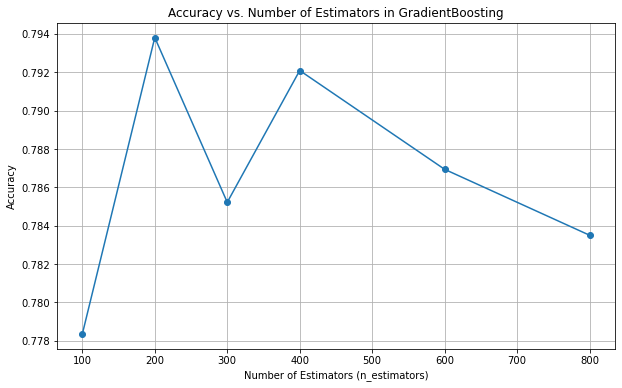

In [6]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

n_estimators_range = [100, 200, 300, 400, 600, 800]
accuracies = []
best_accuracy = 0
best_n = 0
best_y_pred = None 


for n in n_estimators_range:
 
    clf2 = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42)
    clf2.fit(X_train, y_train)
    
    y_pred2 = clf2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred2)
    accuracies.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n
        best_y_pred = y_pred2

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators in GradientBoosting")
plt.grid()
plt.show()

In [7]:
# Print classification report for the best model
print(f"Best n_estimators: {best_n} with accuracy: {best_accuracy*100:.2f}%")
print("Classification Report for the best model:")
print(classification_report(y_test, best_y_pred, target_names=label_encoder.classes_))


Best n_estimators: 200 with accuracy: 79.38%
Classification Report for the best model:
                 precision    recall  f1-score   support

 baseball_pitch       0.70      0.55      0.61        42
 baseball_swing       0.72      0.88      0.79        43
    bench_press       0.93      0.77      0.84        35
           bowl       0.85      0.93      0.89        55
 clean_and_jerk       0.94      0.73      0.82        22
     golf_swing       0.70      0.71      0.71        42
      jump_rope       0.94      0.75      0.83        20
  jumping_jacks       0.81      0.79      0.80        28
         pullup       0.88      0.90      0.89        50
         pushup       0.89      0.89      0.89        53
          situp       0.92      0.88      0.90        25
          squat       0.87      0.81      0.84        58
   strum_guitar       0.96      1.00      0.98        23
tennis_forehand       0.59      0.62      0.60        39
   tennis_serve       0.56      0.68      0.62        47
